This pipeline opens the result of ICAalamelodic.m, lets the user interactively label the components that look like neuronal activity (rather than movement artefacts or noise), sort them by label, plots a final summary for the chosen components, and save the reordered maps and time series.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
%matplotlib inline 
import pylab

Open time series

In [2]:
import scipy.io as sio

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/e14406b6-b6d1-4305-86e1-f0fe5128f521/100212/100212ss1oncregcdFF2000pointspsfkf108Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)

In [5]:
DT=Ua['TSo']

In [6]:
DT.shape

(2879, 108)

In [7]:
S1=DT.shape

In [8]:
DTmean=np.zeros(S1)
DTvar=np.zeros(S1)
Var=np.zeros(S1[1])

In [9]:
for i in range(S1[1]):
    DTmean[:,i]=DT[:,i]-np.mean(DT[:,i],0)

In [10]:
for i in range(S1[1]):
    Var[i]=np.sqrt(np.var(DTmean[:,i]))
    DTvar[:,i]=DTmean[:,i]/Var[i]

In [11]:
DTvar.shape

(2879, 108)

open maps

In [12]:
import nibabel as nb

In [13]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/e14406b6-b6d1-4305-86e1-f0fe5128f521/100212/100212ss1oncregcdFF2000pointspsfkf108Smith0_4_60IC.nii


In [14]:
img1 = nb.load(filename2)

In [15]:
data = img1.get_data()

In [16]:
S=data.shape

In [17]:
S

(72, 66, 9, 108)

# Zscore maps

In [18]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

Transform the maps to have zero mean

In [19]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

Transform the maps to have unit variance and zscore

In [20]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
Dmaps[Dmaps<0]=0

Order ICs by variance

In [21]:
datao=data
Dmapso=Dmaps

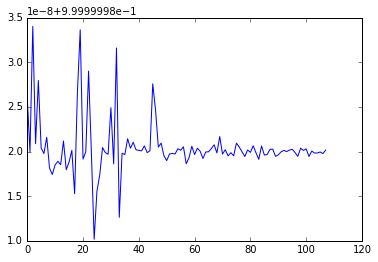

In [22]:
plt.plot(Var)

#Separate maps in substacks, sort the independent components by brain regions 

In [23]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (13, 2.5)

In [24]:
Dtemp=data[:,:,:,0]

In [25]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [26]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=Dtemp[:,:,range(Nstack)]
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        #Dmean[:,:,i]=np.max(Vmean,0)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


In [27]:
DTvar.shape

(2879, 108)

In [28]:
S

(72, 66, 9, 108)

In [29]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

In [30]:
Ua

{'TSo': array([[ -1.39044883e-01,  -6.70242663e-02,  -3.96352539e-02, ...,
           8.00401423e-03,  -4.72256569e-01,  -5.62983592e-02],
        [ -1.01125907e-01,  -1.10994406e-01,  -1.04543362e-01, ...,
           9.21537310e-02,   1.02704009e-02,  -1.34586447e-02],
        [ -1.72173116e-01,  -1.35848018e-01,  -6.52078124e-02, ...,
          -2.93686470e-03,   1.12334113e-01,   3.97238007e-02],
        ..., 
        [ -1.62701866e-01,  -9.53477930e-02,  -5.67612141e-02, ...,
           8.08025609e-03,   2.97021689e-03,  -7.62325392e-03],
        [ -1.47182340e-01,  -9.96527443e-02,  -5.69582014e-02, ...,
          -3.30512523e-03,   3.51076479e-03,   2.26454063e-03],
        [ -1.47817165e-01,  -1.00260191e-01,  -6.12981764e-02, ...,
          -1.38042282e-03,   6.44570335e-05,   1.03389063e-03]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Jun 14 21:20:33 2018',
 '__version__': '1.0'}

In [31]:
Ua=sio.loadmat(filename)
Xk[0,:]=Ua['Groom']
#Xk[1,:]=Ua['Walk']

IOError: [Errno 2] No such file or directory: u'.mat'

/media/sophie/e14406b6-b6d1-4305-86e1-f0fe5128f521/100212/MAX_100212ss1oncregcdFF2000pointspsfkf108Smith0_4_60IC.nii


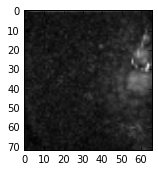

In [32]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape


if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    Dmean=np.zeros([S[0],S[1],Nstack])
    #Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean

plt.imshow(Vmean,cmap=plt.cm.gray)

0


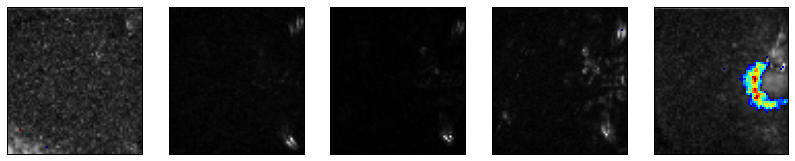

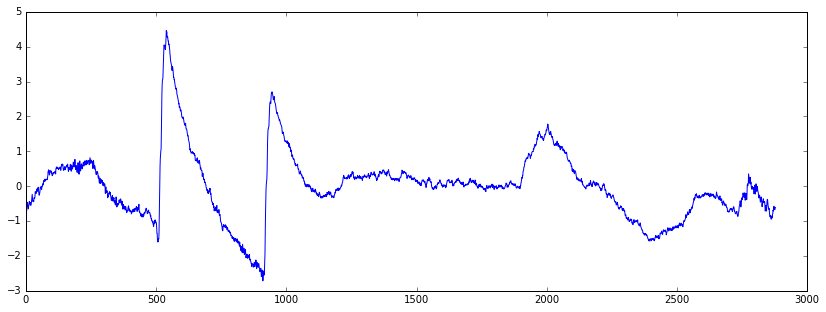


1


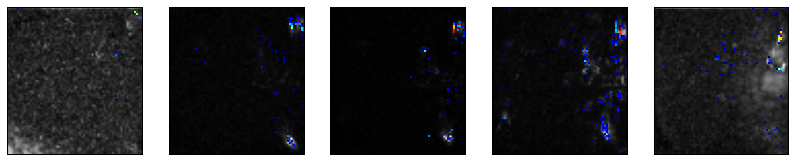

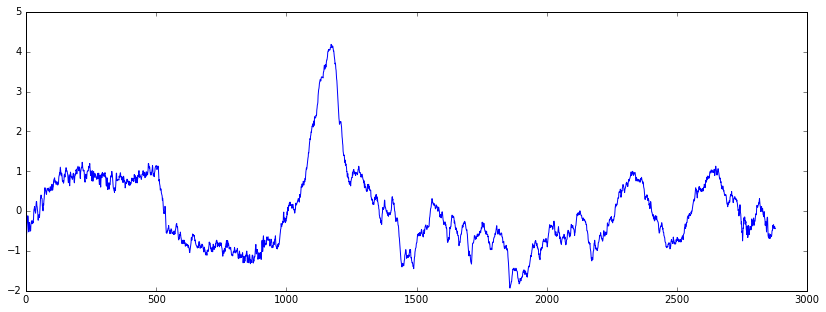


2


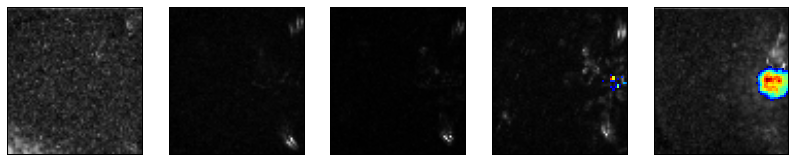

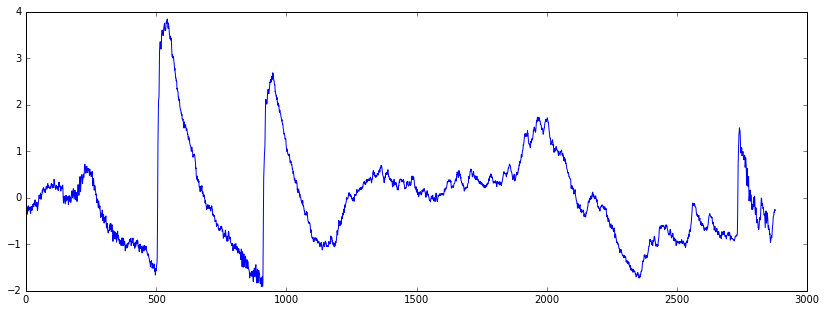


3


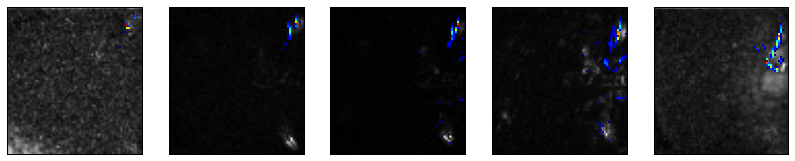

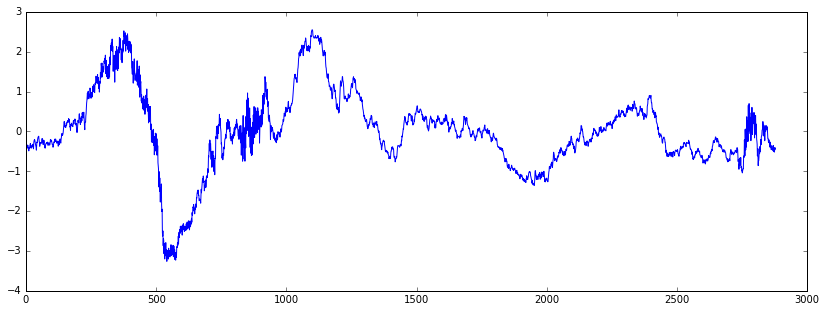


4


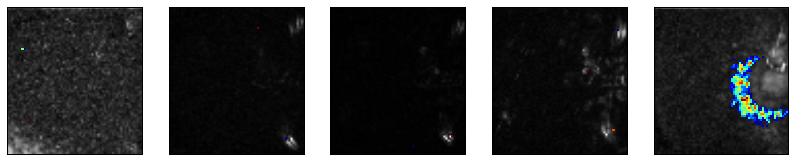

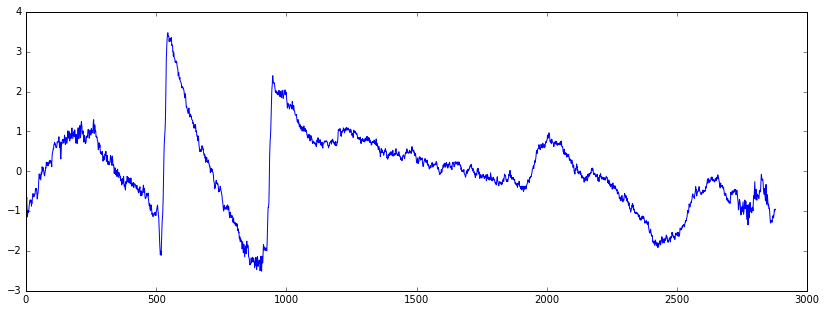


5


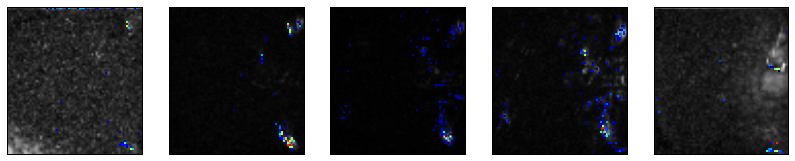

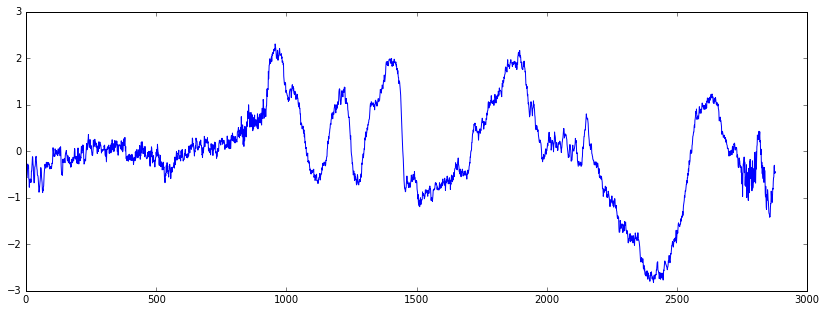


6


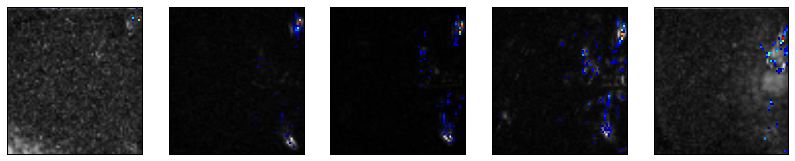

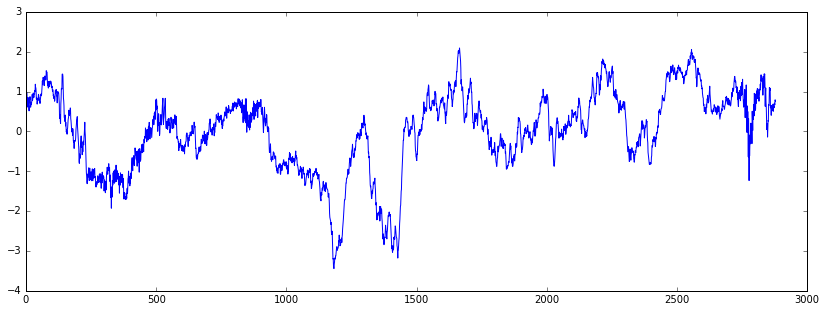


7


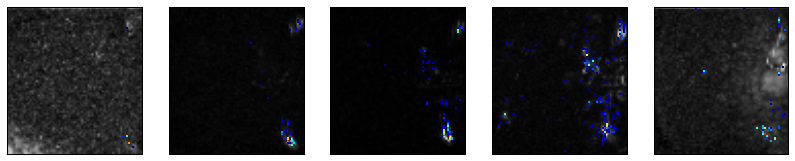

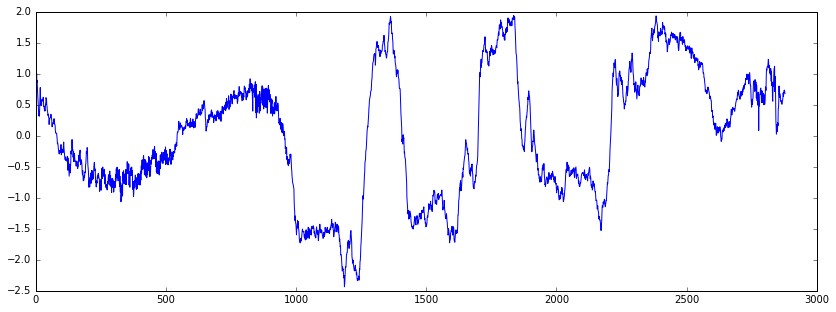


8


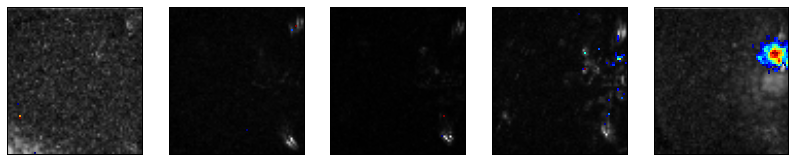

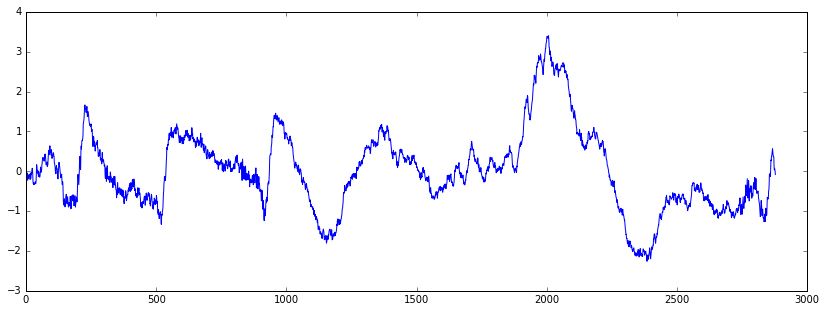


9


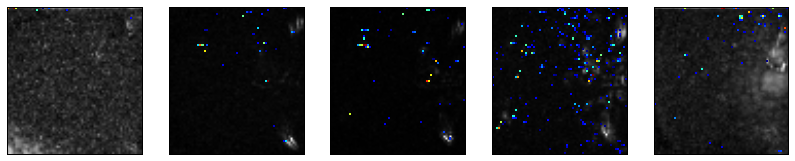

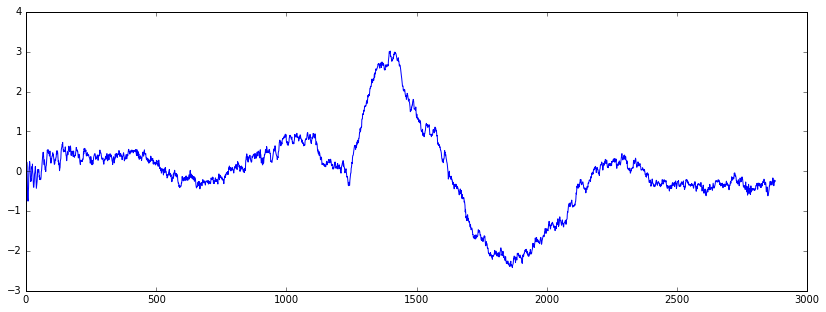


10


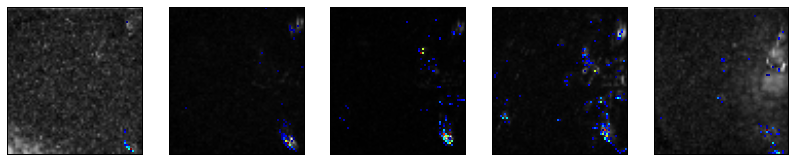

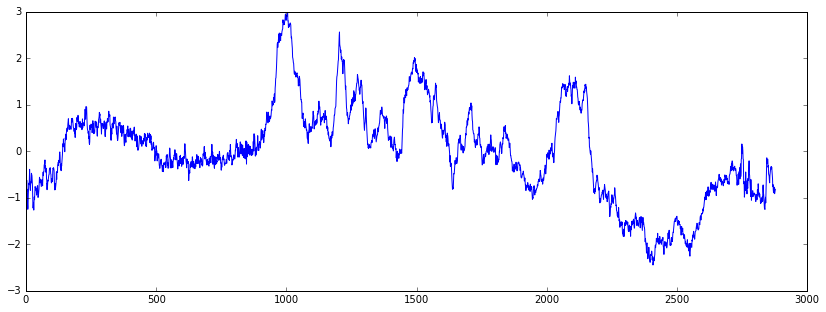


11


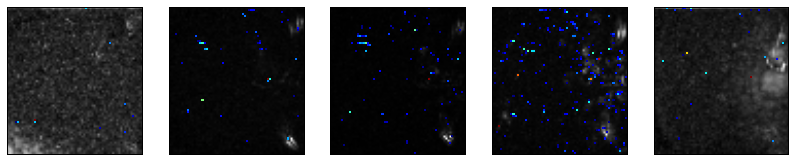

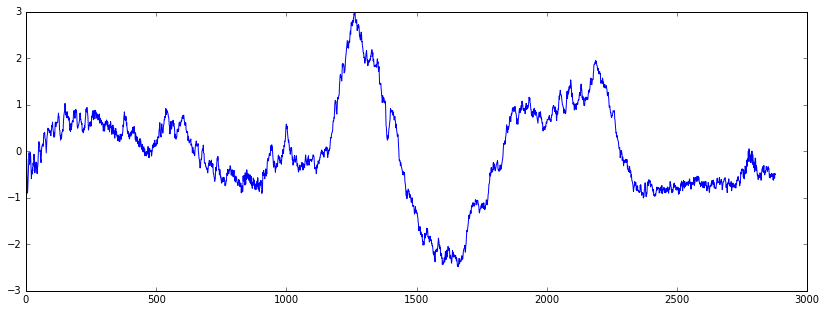


12


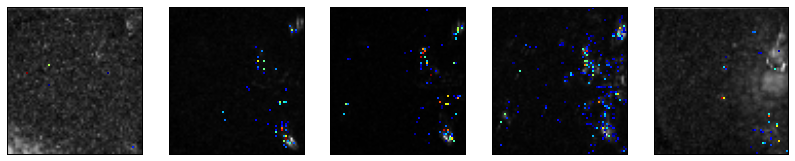

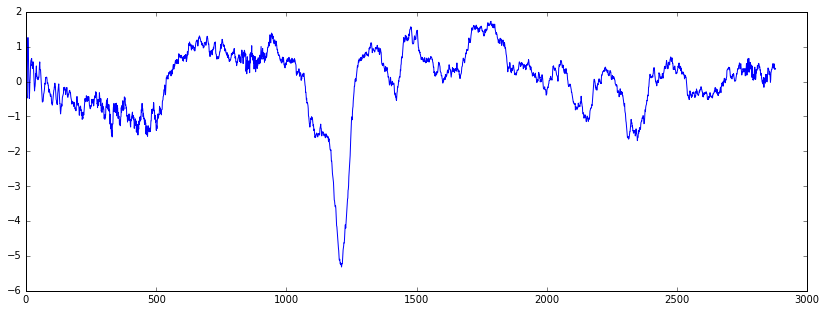


13


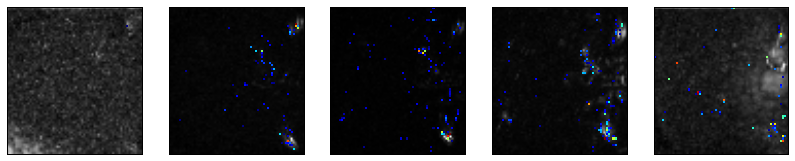

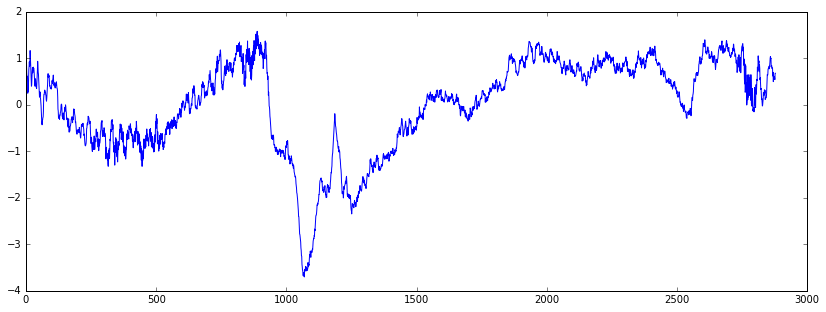


14


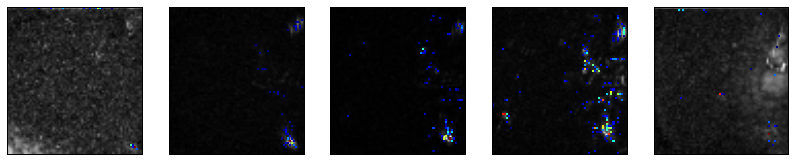

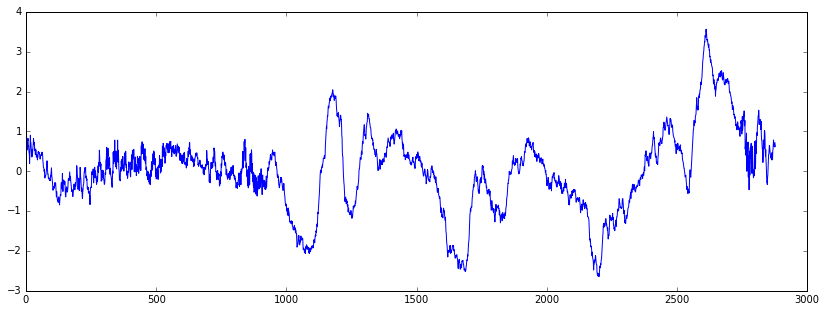


15


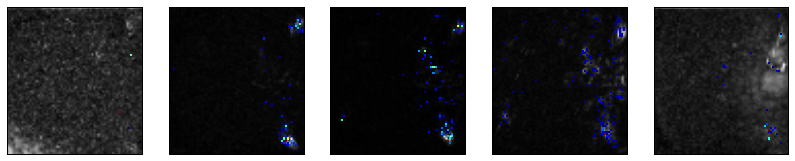

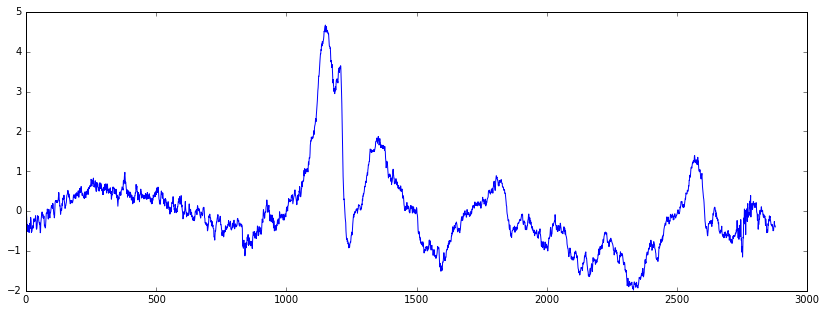


16


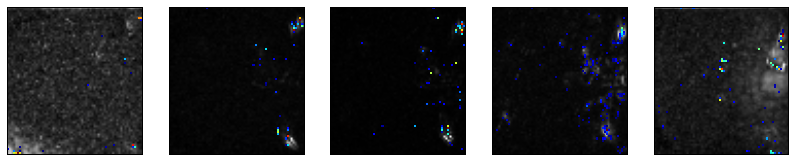

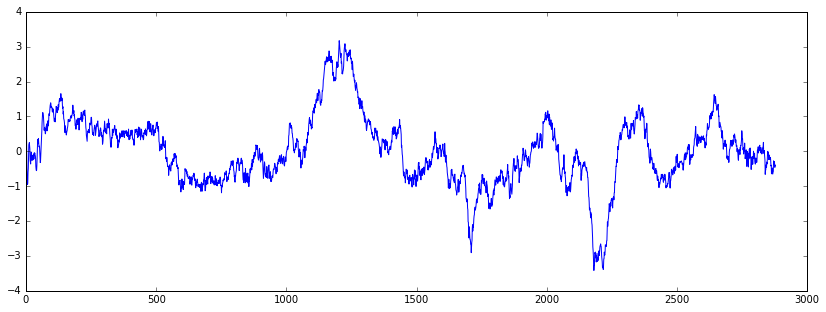


17


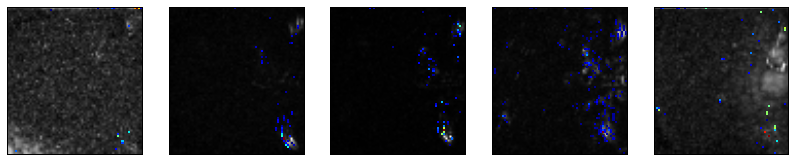

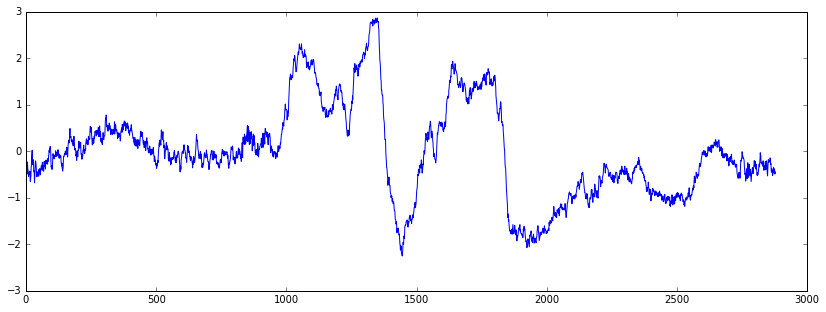


18


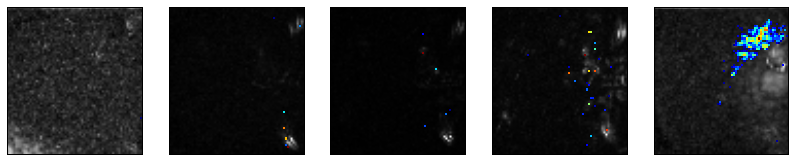

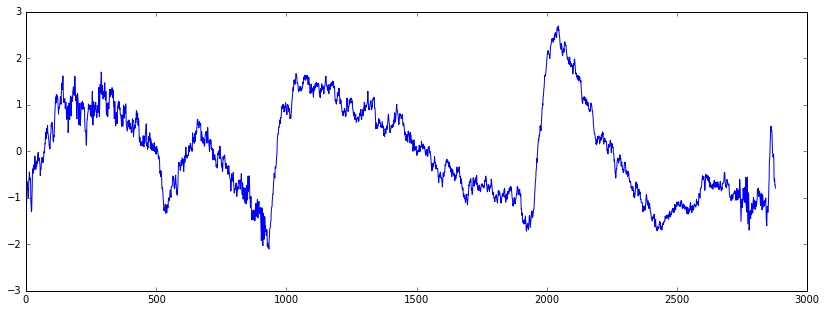


19


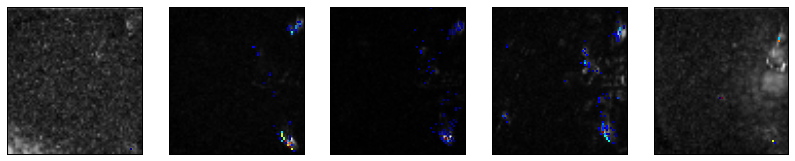

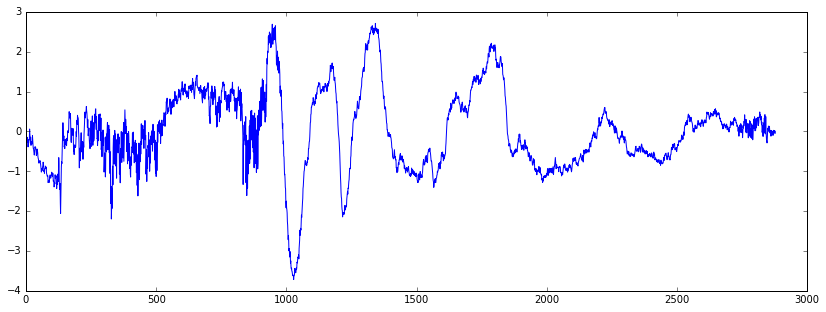


20


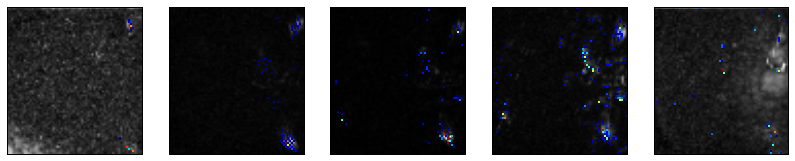

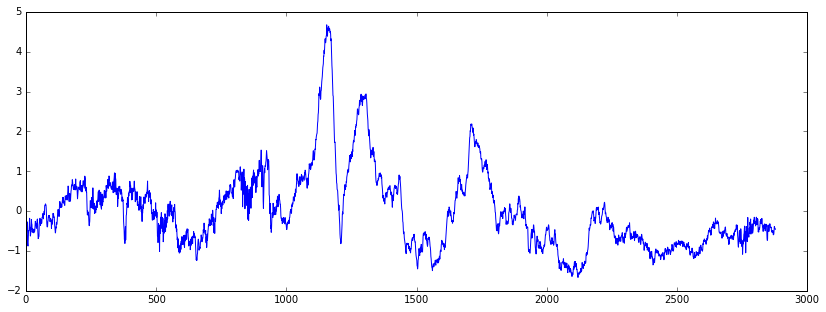


21


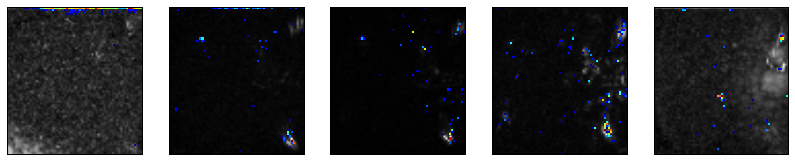

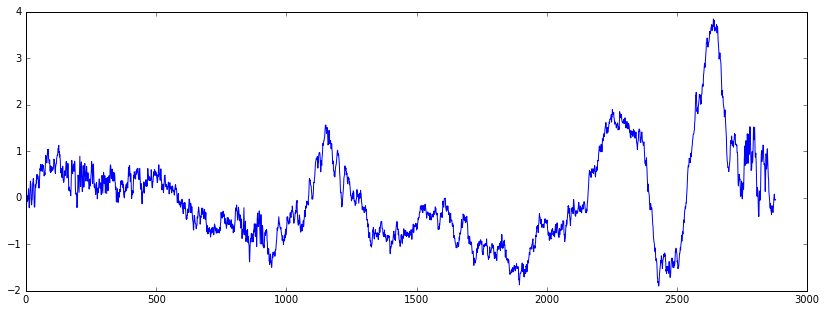


22


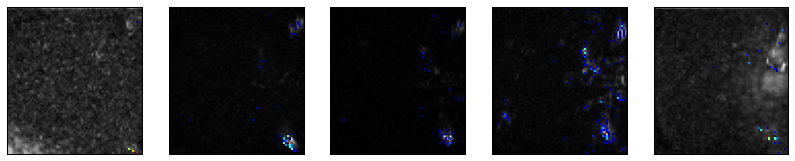

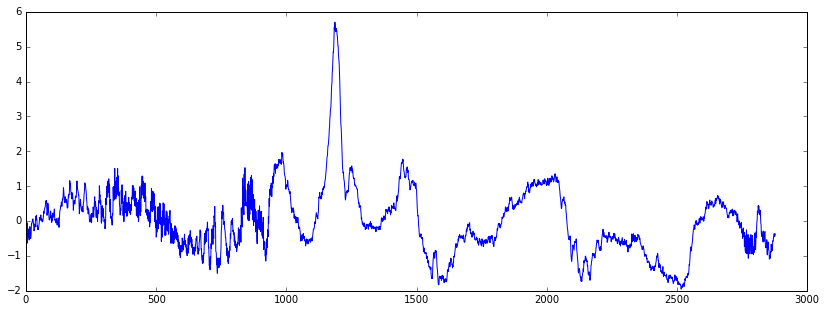


23


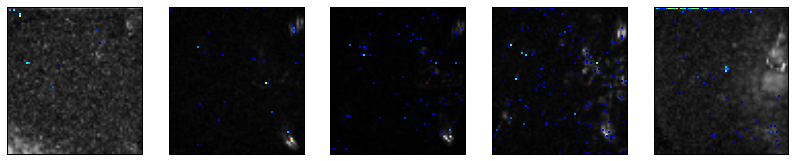

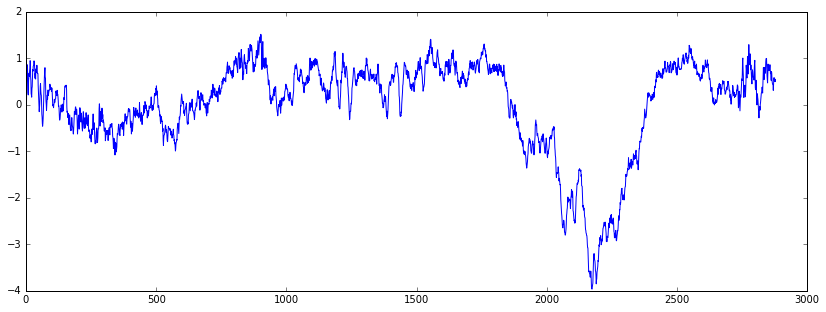


24


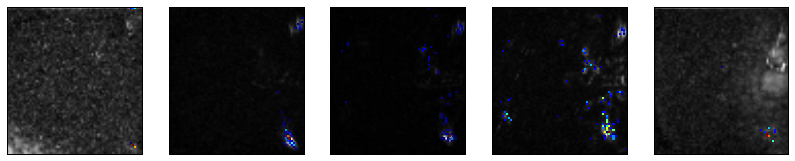

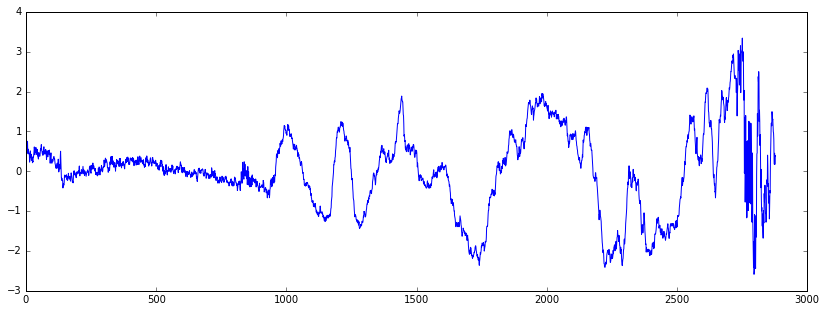


25


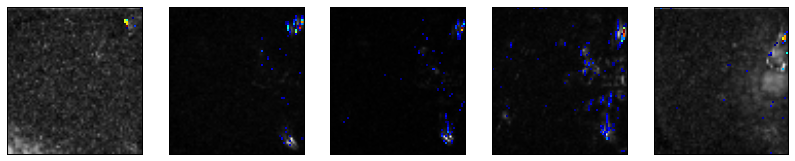

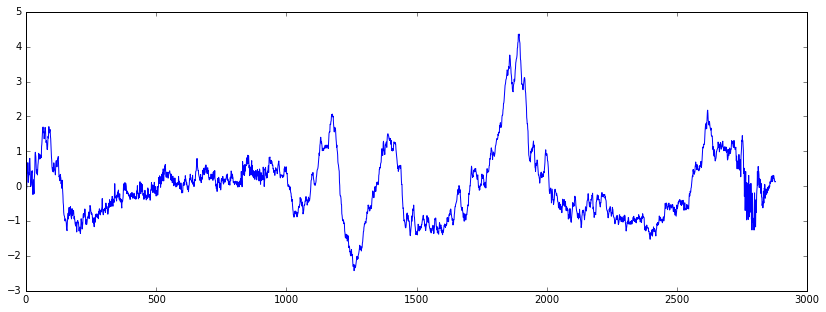


26


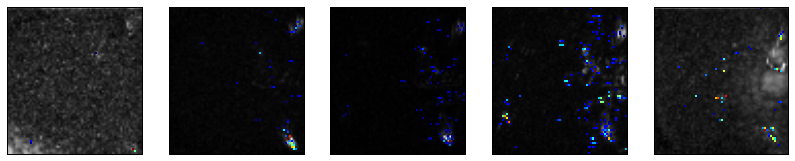

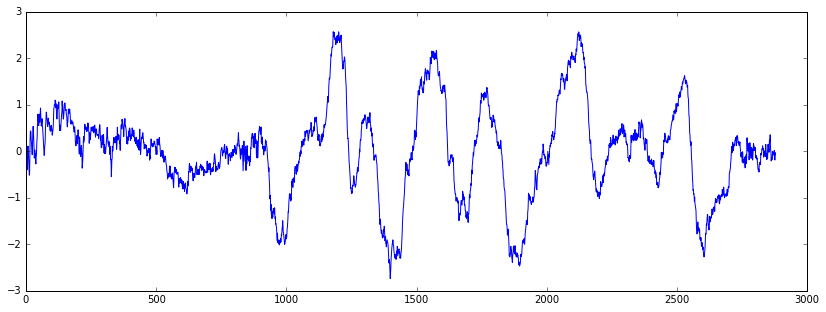

In [ ]:
for j in range(S[3]):

    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,j]
            D1[:,:,i]=V 
            

    print(j)
    for i in range(Nstack):
        plt.subplot(1,5,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    plt.show()
    
   # plt.plot(TS_ROI[Order[j],:])
    plt.plot(DTvar[:,j])
    #plt.plot(Xk[0,:]/np.std(Xk[0,:])+0.5,color=(1,0,0))   
    #plt.plot(Xk[1,:]/np.std(Xk[1,:])+0.5,color=(0,1,0))
    #plt.plot(Xk[2,:]/np.std(Xk[1,:])+0.5,color=(0.5,0.5,0))    
    #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    
    plt.show()
    
    Label_ICs.append(raw_input())
    if Label_ICs[j]=='':
        Good_ICs[j]=0
    else:
        Good_ICs[j]=1
        
        

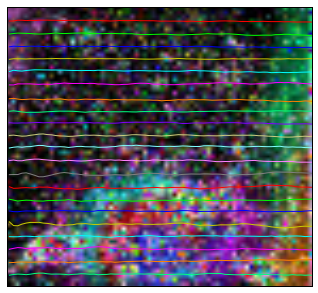

In [37]:
List1=[(Label_ICs[i],i) for i in range(S[3])]
Newlist=sorted(List1, key=lambda List1: List1[0])

Neworder=[Newlist[i][1] for i in range(S[3])]

NewDT=DTvar[:,Neworder[:]].T

for j in range(len(Neworder)):
    A=NewDT[:,j]
    V=np.sqrt(np.var(A))
    NewDT[:,j]=A/V

C1=np.zeros([13,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
C1[6][:]=(1,0.5,0)
C1[7][:]=(0,1,0.5)
C1[8][:]=(0.5,0,1)
C1[9][:]=(0.8,0.8,0.5)
C1[10][:]=(0.5,1,1)
C1[11][:]=(1,0.5,1)
C1[12]=(0.5,0.5,0.5)
h=3

Newmaps=Dmaps[:,:,:,Neworder[:]]

L=len(set([Label_ICs[Neworder[i]] for i in range(len(Neworder))]))

Regionmaps=np.zeros([S[0],S[1],L,3])
Datasort=np.zeros([S[0],S[1],S[2],L,3])

Regionname=[]

DMapsordered=Dmapso[:,:,:,Neworder[:]]

DMapsordered=Dmapso[:,:,:,Neworder[:]]

j=0
i=0
k=Label_ICs[Neworder[0]]
m=0
Regionname.append(Label_ICs[Neworder[i]])
for i in range(len(Neworder)):
    #C2=C1[i%6][:]
    for l in range(3):
        M=np.max(np.squeeze(np.reshape(Newmaps[:,:,:,i],S[0]*S[1]*S[2])))
        Regionmaps[:,:,j,l]=Regionmaps[:,:,j,l]+0.6*np.max(DMapsordered[:,:,:,i],2)*C1[i%13][l]/M
        Datasort[:,:,:,j,l]=Datasort[:,:,:,j,l]+Dmaps[:,:,:,Neworder[i]]*C1[i%13][l] 
    i=i+1
    m=m+1
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
    if k1 != k:
        j=j+1
        k=k1
        m=0
        Regionname.append(Label_ICs[Neworder[i]])

pylab.rcParams['figure.figsize'] = (14, 5)
import scipy
from scipy import ndimage
j=0
m=0
L=0
k=Label_ICs[Neworder[0]]
for i in range(len(Neworder)):
    m=m+1
    
    
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
    if k1 != k:
        
        k=k1
        m=0
        
        plt.show()
        plt.figure(2*j+1)
        Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
        IM=plt.imshow(Rotated_Plot) 
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        j=j+1
        plt.figure(2*j)
        #plt.plot(Xk[0,:]/np.std(Xk[0,:])+0.5,color=(1,0,0))   
        #plt.plot(Xk[1,:]/np.std(Xk[1,:])+0.5,color=(0,1,0))
        #plt.plot(Xk[2,:]/np.std(Xk[1,:])+0.5,color=(0.5,0.5,0))    
        #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    plt.plot(NewDT[i,:]+h*m,color=C1[i%13][:])
    
plt.figure(2*j+1)
Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
IM=plt.imshow(Rotated_Plot)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)